In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten,BatchNormalization
from tensorflow.keras.models import Sequential

# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.metrics import classification_report

# from IPython.display import clear_output
# import warnings
# warnings.filterwarnings('ignore')

In [128]:
dir="train_data"

data=pd.read_csv("train_labels.csv")

SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [129]:
n=len(os.listdir(dir))
print("Number of images in test and train set : ",n)

Number of images in test and train set :  8000


Number of cats vs dogs images :  4000  :  4000


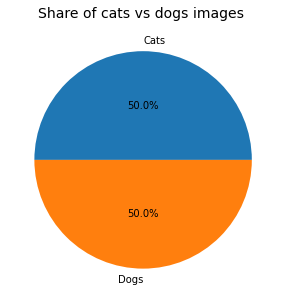

In [130]:
cats=dogs=0
for i in data["label"]:
    if i=="cat":
        cats+=1
    elif i=="dog":
        dogs+=1

plt.figure(figsize=(5, 5))
plt.pie(x=np.array([cats,dogs]), autopct="%.1f%%", labels=["Cats", "Dogs"], pctdistance=0.5)
plt.title("Share of cats vs dogs images ", fontsize=14)
print("Number of cats vs dogs images : ",cats," : ",dogs)


In [131]:
IMG_WIDTH=128
IMG_HEIGHT=128

IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH)
seed=69

INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)

In [132]:
#make input data into desired format


# cats_files=[]
# dogs_files=[]

# for i,label in enumerate(data["label"]):
#     if label=="cat":
#         cats_files.append(str(data["id"][i])+".png")
#     elif label=="dog":
#         dogs_files.append(str(data["id"][i])+".png")

# for f in cats_files:
#     shutil.copyfile(os.path.join(dir,f),os.path.join("train/cats",f))

# for f in dogs_files:
#     shutil.copyfile(os.path.join(dir,f),os.path.join("train/dogs",f))
    



In [133]:
BATCH_SIZE=32

train_set=image_dataset_from_directory(
    "train",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)

test_set=image_dataset_from_directory(
    "train",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.


In [134]:
# def transfer_learning():
#     base_model=DenseNet121(include_top=False,input_shape=INPUT_SHAPE,weights="imagenet")
    
#     thr=149
#     for layers in base_model.layers[:thr]:
#         layers.trainable=False
    
#     for layers in base_model.layers[thr:]:
#         layers.trainable=True
    
#     return base_model

In [139]:
def create_model():
    model=Sequential()
    
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=INPUT_SHAPE))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(2,activation='softmax'))
    
    model.summary()
    
    return model

In [140]:
model=create_model()

model.compile(optimizer="adam", 
                loss='binary_crossentropy',
                metrics = "accuracy")

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_46 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_47 (Bat  (None, 61, 61, 64)       256       
 chNormalization)                                                
                                                     

In [141]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.2,min_lr = 0)
callbacks = [earlystop,learning_rate_reduction]

In [142]:
EPOCHS=50

history = model.fit(x = train_set,validation_data=test_set,epochs = EPOCHS,callbacks=callbacks)

Epoch 1/50
200/200 [==============================] - 159s 787ms/step - loss: 0.7215 - accuracy: 0.5891 - val_loss: 0.7943 - val_accuracy: 0.5894 - lr: 0.0010
Epoch 2/50
200/200 [==============================] - 186s 930ms/step - loss: 0.6506 - accuracy: 0.6400 - val_loss: 0.6665 - val_accuracy: 0.6294 - lr: 0.0010
Epoch 3/50
200/200 [==============================] - 181s 906ms/step - loss: 0.6088 - accuracy: 0.6733 - val_loss: 0.6241 - val_accuracy: 0.6556 - lr: 0.0010
Epoch 4/50
200/200 [==============================] - 168s 842ms/step - loss: 0.5706 - accuracy: 0.7025 - val_loss: 0.6550 - val_accuracy: 0.6406 - lr: 0.0010
Epoch 5/50
200/200 [==============================] - ETA: 0s - loss: 0.5389 - accuracy: 0.7258
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
200/200 [==============================] - 168s 840ms/step - loss: 0.5389 - accuracy: 0.7258 - val_loss: 0.7167 - val_accuracy: 0.6319 - lr: 0.0010
Epoch 6/50
200/200 [=======================

  75 % validation acc with 3,314,690 total params

In [143]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


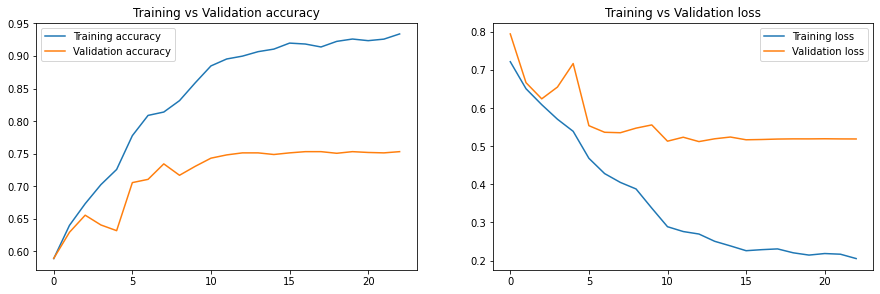

In [144]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs Validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs Validation loss")

plt.show()